# Project: Does it make statistical sense to go for a 2-pt conversion over a Point-After-Touchdown(PAT) in the NFL?

## Introduction
The 2-point conversion was first introduced to the NFL in 1994, though a variant had been used earlier in the AFL before the leagues merged. The rule remained largely unchanged until the 2015 season when the NFL moved the PAT (Point-After-Touchdown) attempt from the 2-yard line back to the 15-yard line. This adjustment made the PAT less of a "sure thing" and led to an increase in 2-point conversion attempts. The most recent change occurred ahead of the 2023 season when the NFL moved the 2-point conversion attempt from the 2-yard line to the 1-yard line. This modification is the focus of our data analysis.

### Question: What is the success rate of 2-pt conversions compared to PATs since the NFL changed the rule for 2-pt conversions leading into the 2023 season?

The dataset that I will be working from was downloaded from nfl.com. Specifically the scoring data for all teams in the 2023 and 2024 seasons. 

I will be combining the seasons based on the team name. This shouldn't have a negative affect on the data and it allows it to be more readable.

In [1]:
%pip install numpy matplotlib seaborn

In [2]:
# Importing packages that I will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Allow us to plot visualizations inline with the notebook
%matplotlib inline

<ipython-input-2-7e68eed91f30>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Data Wrangling

The data was formatted in the 'comma seperated vales' in excel, taken directly from the website. Here is where I load the data and assign it to the variable 'df' (for DataFrame). I then print the first few rows of the df to observe the format of the columns as well as their names. I can now decide which ones to keep and trim to add a level of uniformity to the Data Frame.

#### General Properties

In [3]:
# Load in the dataFrame (Last updated 17 Dec 2024)
df = pd.read_csv('NFLstats.csv')
df.head()

,Rk,Tm,G,RshTD,RecTD,PR TD,KR TD,FblTD,IntTD,OthTD,...,2PM,2PA,D2P,XPM,XPA,FGM,FGA,Sfty,Pts,Pts/G
0,1,Los Angeles Chargers,14,13,16,NaN,NaN,NaN,1.0,NaN,...,1.0,2,NaN,25,28,29,31,NaN,294,21.0
1,2,Philadelphia Eagles,14,26,18,NaN,NaN,NaN,NaN,NaN,...,3.0,6,1.0,37,38,20,26,NaN,369,26.4
2,3,Denver Broncos,14,10,21,NaN,NaN,2.0,3.0,NaN,...,NaN,1,NaN,35,35,27,30,2.0,336,24.0
3,4,Minnesota Vikings,14,9,29,NaN,NaN,1.0,2.0,NaN,...,NaN,1,NaN,39,40,28,32,NaN,369,26.4
4,5,Kansas City Chiefs,14,12,22,NaN,NaN,1.0,NaN,NaN,...,NaN,1,NaN,32,33,29,33,NaN,329,23.5


### Data characteristics

I will use the 'shape' function to get a sense of how big our data frame is. I am expecting 64 rows (32 teams over 2 seperate seasons).

In [4]:
df.shape

(64, 21)

This tells us that our data frame is 64 rows down and 16 columns across. We will be changing this further down.

We will now start the cleaning process.

In [5]:
# Remove rows where all columns are NaN
df = df.dropna(how='all')

### Data Cleaning
With the calculations completed, it's time to clean the data. We removed unnecessary columns and reorganized the remaining ones.

In [6]:
team_data = df.groupby('Tm').agg({
    '2PM': 'sum',
    '2PA': 'sum',
    'XPM': 'sum',
    'XPA': 'sum'
}).reset_index()

team_data['2PPerc'] = (team_data['2PM'] / team_data['2PA']) * 100 # 2-point percentage
team_data['XPPerc'] = (team_data['XPM'] / team_data['XPA']) * 100 # Extra-point percentage

total_2PM = team_data['2PM'].sum()
total_2PA = team_data['2PA'].sum()
total_XPM = team_data['XPM'].sum()
total_XPA = team_data['XPA'].sum()

league_2P_Percent = (total_2PM / total_2PA) * 100 if total_2PA > 0 else 0
league_2P_Percent = round(league_2P_Percent, 2)
league_XP_Percent = (total_XPM / total_XPA) * 100 if total_XPA > 0 else 0
league_XP_Percent = round(league_XP_Percent, 2)

league_totals = pd.DataFrame({
    'Tm': ['League'],
    '2PM': total_2PM,
    '2PA': total_2PA,
    'XPM': total_XPM,
    'XPA': total_XPA,
    '2PPerc': [league_2P_Percent],
    'XPPerc': [league_XP_Percent]
})

# Assign appropriate dtypes
league_totals['2PM'] = league_totals['2PM'].astype(int)  # For total 2PM, you can cast it to int
league_totals['2PA'] = league_totals['2PA'].astype(int)  # For total 2PA, you can cast it to int
league_totals['XPM'] = league_totals['XPM'].astype(int)  # For total XPM, you can cast it to int
league_totals['XPA'] = league_totals['XPA'].astype(int)  # For total XPA, you can cast it to int
league_totals['2PPerc'] = league_totals['2PPerc'].astype(float)  # 2-point percentage as float
league_totals['XPPerc'] = league_totals['XPPerc'].astype(float)  # Extra-point percentage as float

print(league_totals)

       Tm  2PM  2PA   XPM   XPA  2PPerc  XPPerc
0  League  115  242  2089  2176   47.52    96.0


In [7]:
# The column '2PM' is a float and since you can't have fractions of made attempts, we want to switch them to integars.
team_data['2PM'] = team_data['2PM'].astype(int)
print(team_data['2PM'].dtype)
print(team_data.head())

int32
                  Tm  2PM  2PA  XPM  XPA     2PPerc     XPPerc
0  Arizona Cardinals    7   17   50   51  41.176471  98.039216
1    Atlanta Falcons    4    8   53   54  50.000000  98.148148
2   Baltimore Ravens    3    5   98  101  60.000000  97.029703
3      Buffalo Bills    4    5   99  104  80.000000  95.192308
4  Carolina Panthers    4    6   40   44  66.666667  90.909091


In [8]:
team_data.head()

,Tm,2PM,2PA,XPM,XPA,2PPerc,XPPerc
0,Arizona Cardinals,7,17,50,51,41.176471,98.039216
1,Atlanta Falcons,4,8,53,54,50.000000,98.148148
2,Baltimore Ravens,3,5,98,101,60.000000,97.029703
3,Buffalo Bills,4,5,99,104,80.000000,95.192308
4,Carolina Panthers,4,6,40,44,66.666667,90.909091


In [9]:
team_data = pd.concat([team_data, league_totals], ignore_index=True)

print(team_data)
print(f'League XPPerc: {league_XP_Percent}%')
print(f'League 2PPerc: {league_2P_Percent}%')

                       Tm  2PM  2PA   XPM   XPA     2PPerc      XPPerc
0       Arizona Cardinals    7   17    50    51  41.176471   98.039216
1         Atlanta Falcons    4    8    53    54  50.000000   98.148148
2        Baltimore Ravens    3    5    98   101  60.000000   97.029703
3           Buffalo Bills    4    5    99   104  80.000000   95.192308
4       Carolina Panthers    4    6    40    44  66.666667   90.909091
5           Chicago Bears    4   14    51    54  28.571429   94.444444
6      Cincinnati Bengals    2    4    84    86  50.000000   97.674419
7        Cleveland Browns   11   17    47    52  64.705882   90.384615
8          Dallas Cowboys    5    8    75    78  62.500000   96.153846
9          Denver Broncos    4    8    64    66  50.000000   96.969697
10          Detroit Lions    3    7   102   107  42.857143   95.327103
11      Green Bay Packers    4    9    73    78  44.444444   93.589744
12         Houston Texans    2    9    62    64  22.222222   96.875000
13    

In [10]:
# save the new df (team_data)
team_data.to_csv('clean_data.csv', index=False)

The following facet chart helps determine the best option (XP or 2P) based on the game scenario. For instance, if there’s less than 1 minute left in the game and your team scores a touchdown to go up by 1 point, opting for a 2-point conversion is the better choice, regardless of the projected success rate. This is because being up 2 points (after a successful XP) is essentially the same as being up 1 point if the 2P attempt or XP miss occurs. Even if the 2P attempt has only a 10% chance of success, it should still be attempted, as securing a 3-point lead ensures that if the opposing team scores a field goal, the game will be tied if the 2P is successful, or they will win if the 2P fails (but making the XP and allowing a field goal still results in a loss).

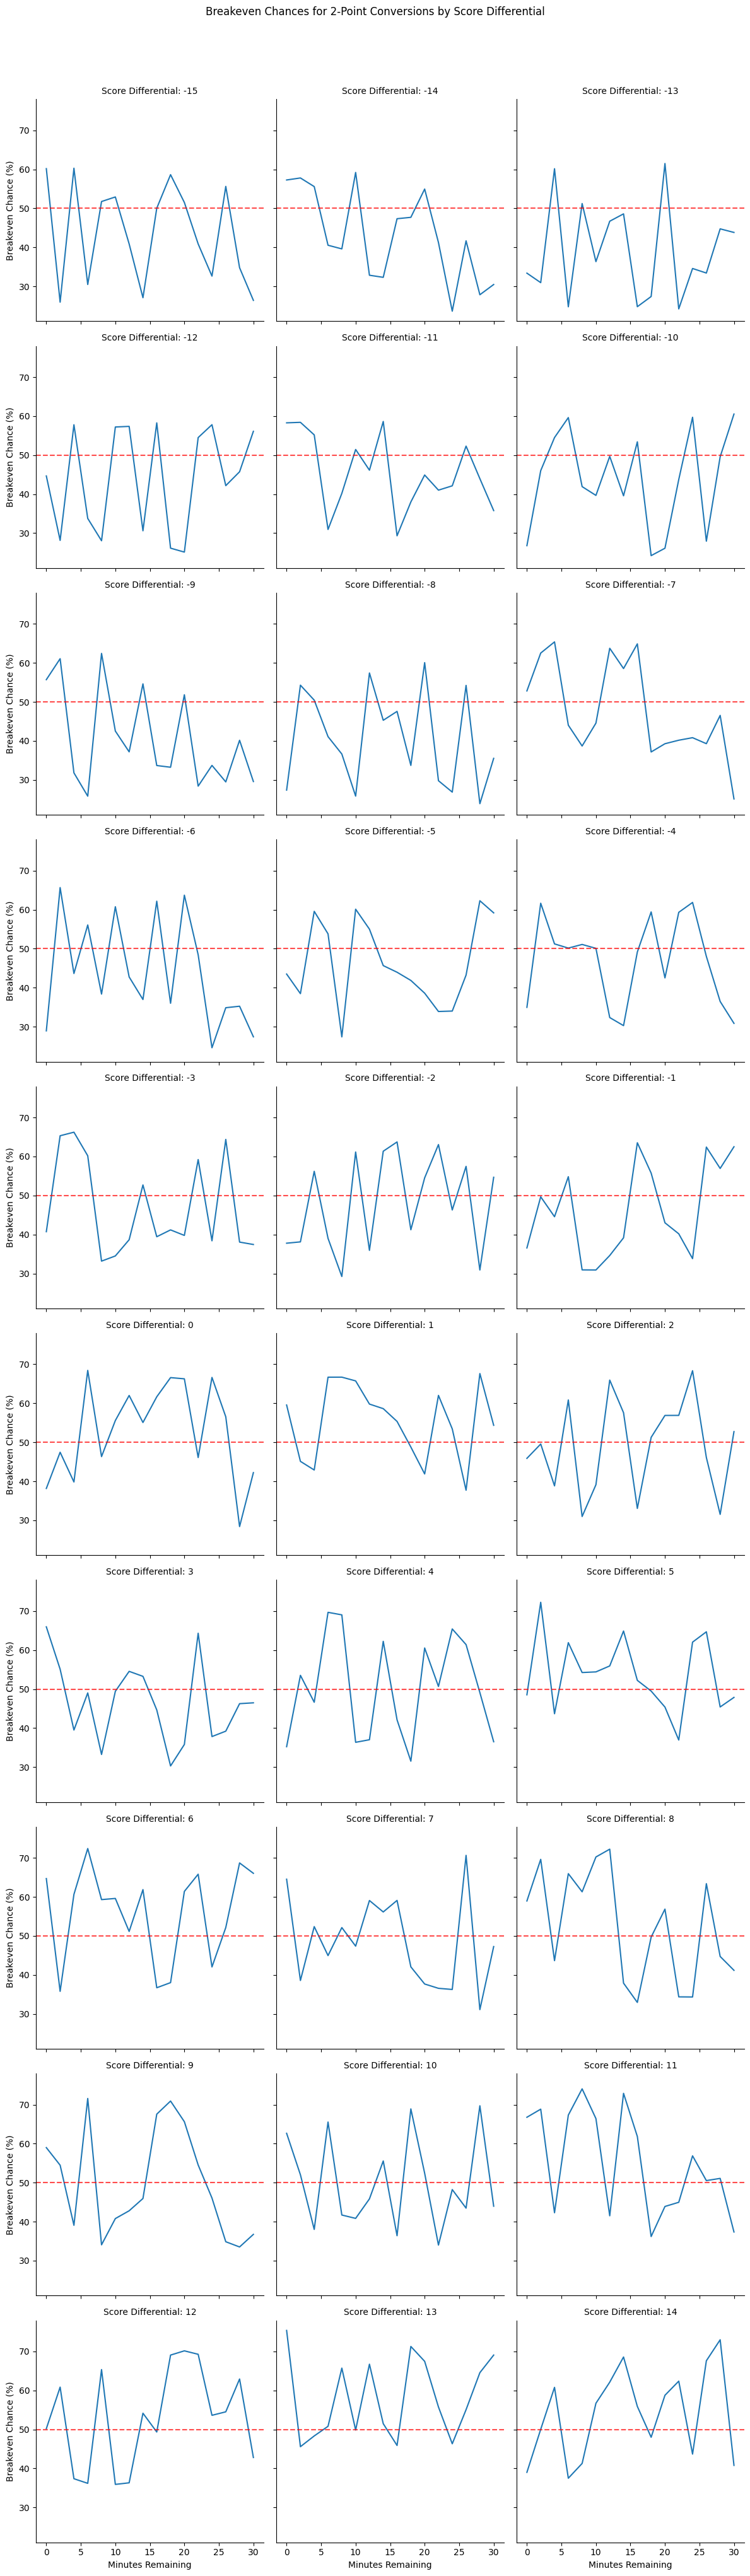

In [11]:
# Create score_differential from -15 to 14
score_differential = [i for i in range(-15, 15)]

# Create minutes_remaining with 2-minute intervals, counting down from 30
minutes_remaining = np.arange(30, -1, -2)  # From 30 to 0 in steps of -2

# Generate sample data
data = []

for score in score_differential:
    for minute in minutes_remaining:
        breakeven_chance = np.random.uniform(30, 70) + (score * 0.5) - (minute * 0.1)
        data.append([score, minute, breakeven_chance])

# Create a DataFrame
df = pd.DataFrame(data, columns=['score_differential', 'minutes_remaining', 'breakeven_chance'])

# Set up the FacetGrid
g = sns.FacetGrid(df, col="score_differential", col_wrap=3, height=4, sharey=True, sharex=True)

# Plot each line chart
g.map(sns.lineplot, "minutes_remaining", "breakeven_chance")

# Add a reference line at 50% breakeven chance
for ax in g.axes.flat:
    ax.axhline(50, ls='--', color='red', alpha=0.7)

# Reverse the x-axis for each plot (minutes remaining)
for ax in g.axes.flat:
    ax.invert_xaxis()

# Customize labels and titles
g.set_axis_labels("Minutes Remaining", "Breakeven Chance (%)")
g.set_titles("Score Differential: {col_name}")
g.fig.suptitle("Breakeven Chances for 2-Point Conversions by Score Differential", y=1.02)

plt.tight_layout()
plt.show()

In [12]:
# Load the clean data
df = pd.read_csv('clean_data.csv')

# Calculate the 2-point and XP success rates for each team
df['2PPerc'] = df['2PM'] / df['2PA'] * 100
df['XPPerc'] = df['XPM'] / df['XPA'] * 100

# Calculate the weighted average success rates for 2P and XP
total_2P_attempts = (df['2PA'] * df['2PPerc']).sum()
total_XP_attempts = (df['XPA'] * df['XPPerc']).sum()
total_2P_attempts_weighted = df['2PA'].sum()
total_XP_attempts_weighted = df['XPA'].sum()

# Overall success rates (weighted average)
overall_2P_success_rate = total_2P_attempts / total_2P_attempts_weighted
overall_XP_success_rate = total_XP_attempts / total_XP_attempts_weighted

# Print the overall success rates for both 2P and XP
print(f"Overall 2-point success rate: {overall_2P_success_rate:.2f}%")
print(f"Overall XP success rate: {overall_XP_success_rate:.2f}%")

Overall 2-point success rate: 47.52%
Overall XP success rate: 96.00%


In [13]:
# Example success rates (you should already have these from your calculations)
overall_2P_success_rate = total_2P_attempts / total_2P_attempts_weighted
overall_XP_success_rate = total_XP_attempts / total_XP_attempts_weighted

# Convert success rates from percentage to fraction
overall_2P_success_rate /= 100  # Convert to a decimal between 0 and 1
overall_XP_success_rate /= 100  # Convert to a decimal between 0 and 1

# Check if the success rates are within the valid range [0, 1]
if not (0 <= overall_2P_success_rate <= 1):
    raise ValueError(f"Invalid 2P success rate: {overall_2P_success_rate}")
if not (0 <= overall_XP_success_rate <= 1):
    raise ValueError(f"Invalid XP success rate: {overall_XP_success_rate}")

# Print the overall success rates for both 2P and XP
print(f'Overall 2-point success rate: {overall_2P_success_rate:.2f}')
print(f'Overall XP success rate: {overall_XP_success_rate:.2f}')

# Now run the Monte Carlo simulation
n_simulations = 10000  # Number of simulations

# Monte Carlo Simulation for 2P and XP
xp_simulated = np.random.binomial(1, overall_XP_success_rate, n_simulations)
two_point_simulated = np.random.binomial(1, overall_2P_success_rate, n_simulations)

# Results of the simulation
xp_points = xp_simulated * 1  # Each XP attempt gives 1 point
two_point_points = two_point_simulated * 2  # Each 2P attempt gives 2 points

# Compare the outcomes
better_choice = np.where(two_point_points > xp_points, '2P', 'XP')

# Summarize the simulation results
print(f'XP chosen: {np.sum(better_choice == 'XP') / n_simulations * 100:.2f}%')
print(f'2P chosen: {np.sum(better_choice == '2P') / n_simulations * 100:.2f}%')


Overall 2-point success rate: 0.48
Overall XP success rate: 0.96
XP chosen: 51.95%
2P chosen: 48.05%
